## **Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## **Loading the dataset**

In [ ]:
df=pd.read_excel('/content/Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## **Checking for null values**

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## **Checking the shape of our dataset**

In [ ]:
df.shape

(541909, 8)

Since our dataset is sufficiently large , we will drop the null value rows.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(406829, 8)

## **Our Goal**
Based on information given to us , we would like to group customers into different clusters , this can ensure effective marketing strategies ,targeting customers who are expected to benefit the organization more.

## **What all patterns can we consider??**



*   How recent was the last transaction made by customer?
*  No. of transactions made by customer till now.
* Demographic data (gender , age etc  Not for this dataset).We will consider Country for this dataset.


Lets work with no. of transactions by the customer.

CustomerID is unique for each customer , thus it represents one particular customer.
InvoiceNo is unique for each transaction.It can help us to get the no. of transactions made by a customer.

In [ ]:
series=df.groupby('CustomerID').InvoiceNo.count()
df['num_transactions']=df['CustomerID'].map(series)

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,num_transactions
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,312
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,312
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,312
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,312
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,312
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,312
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,312
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,312
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,312
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,196


Now we will calculate total amount spent by a customer , this will help us to analyze each customers spending patterns and answer the question

Will targeting this customer help us or not?

Total cost for 1 transaction(Lets call it total_price)= quantity*unit price.

Total cost associated with 1 customer = sum of all total_price for that customer id (Lets call it Amount)

In [ ]:
df['tot_price']=df['Quantity']*df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,num_transactions,tot_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,312,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,312,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,312,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,312,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,312,20.34


In [ ]:
series=df.groupby('CustomerID').tot_price.sum()
df['Amount']=df['CustomerID'].map(series)

Now we will deal with how recently the customer has made a transaction.Dates are there at our rescue:🙂

Important Note :- Recency represents the number of days before which last transaction was made. The lesser it is the better since it shows that the customer is active

In [ ]:
last_date=df['InvoiceDate'].max()
df['Difference']=(last_date-df['InvoiceDate']).dt.days
series=df.groupby('CustomerID').Difference.min()
df['Recency']=df['CustomerID'].map(series)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,num_transactions,tot_price,Amount,Difference,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,312,15.30,5288.63,373,301
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,312,20.34,5288.63,373,301
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,312,22.00,5288.63,373,301
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,312,20.34,5288.63,373,301
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,312,20.34,5288.63,373,301




*  Columns like InvoiceNo ,StockCode,Description,Quantity,InvoiceDate,UnitPrice,total_price ,
Difference represent details about single transaction.
*   **Do we need them for our analysis??**
Not now ,because we want to group customers as per their behaviour thus we need details associated with our customer. That is the reason we created columns Amount ,num_transactions etc and will adjust Country later.

We will drop few columns that are not required.



In [ ]:
df.drop(['InvoiceNo' , 'StockCode' ,'Description','Quantity' ,'InvoiceDate','UnitPrice' ,'tot_price','Difference'] , axis='columns', inplace=True)

In [ ]:
df.set_index('CustomerID' , inplace=True)

In [ ]:
df = df.drop_duplicates()
# dropping multiple entries of the same customer

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.head()

,Country,num_transactions,Amount,Recency
CustomerID,,,,
12346.0,United Kingdom,2,0.00,325
12347.0,Iceland,182,4310.00,1
12348.0,Finland,31,1797.24,74
12349.0,Italy,73,1757.55,18
12350.0,Norway,17,334.40,309


1.2518809151949633
18.164560464691544
21.72100093038429


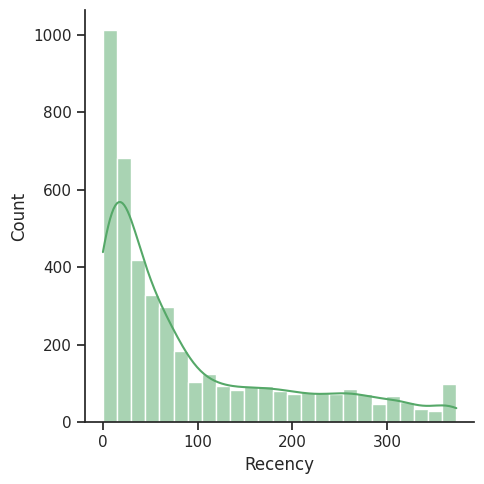

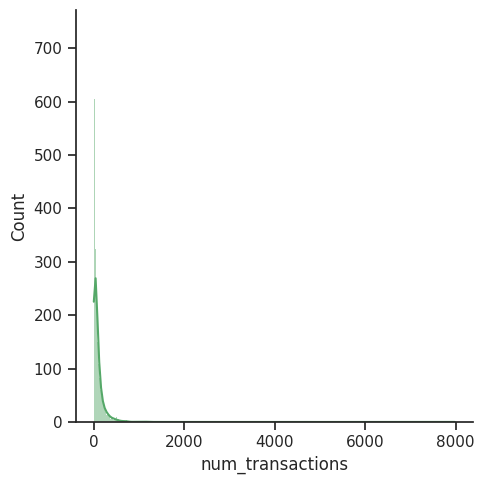

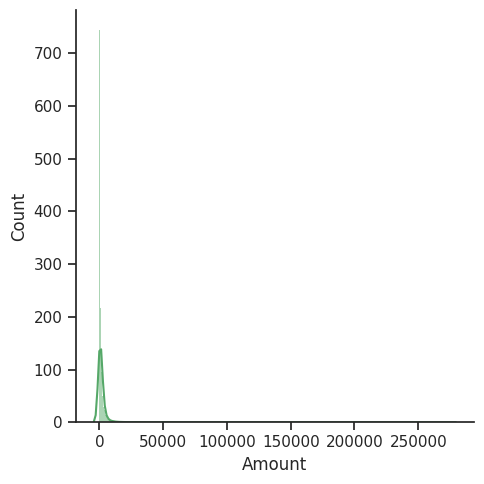

In [ ]:
num_cols=['Recency' , 'num_transactions' ,'Amount']
for col in num_cols:
  print(df[col].skew())
  sns.displot(df[col] ,kde=True , color='g')


Graphs along with the skew scores indicate that our data is positively skewed or right skewed.

We will deal with this later.

## **Checking for outliers**

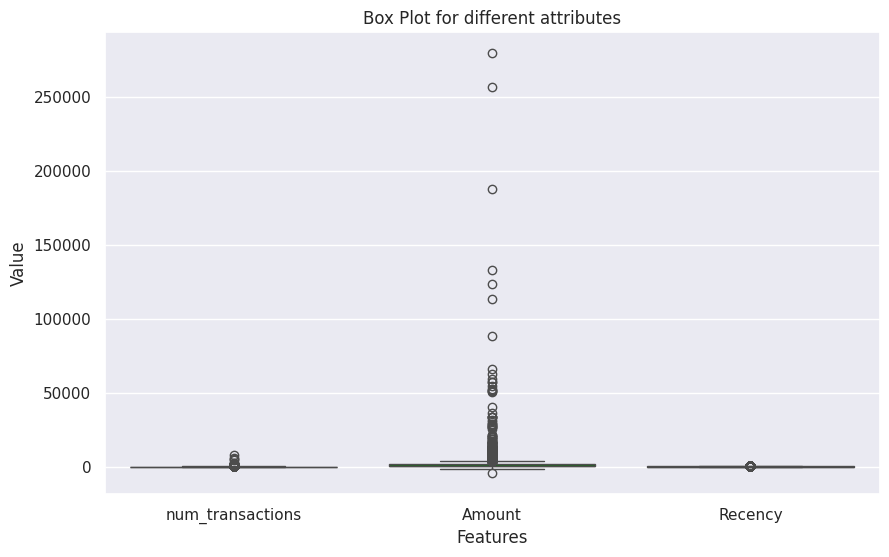

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
x=df.drop('Country' , axis='columns')
sns.boxplot(data=x ,color='green')
plt.title('Box Plot for different attributes')
plt.ylabel('Value')
plt.xlabel('Features')
plt.show()

Amount has significant amount of outliers.This can affect our analysis.

**How can we deal with them?**

We can set a range for our data any value above or below that is removed.
We will set first and third quantiles.

(Generally its 25% and 75% but here we will go with 20% and 80% , just so that we do not remove too much data)


First quantile is the value below which 20% of our data falls whereas third quantile is the value below which 80% of our data falls.


IQR=Q3-Q1

range=[Q1-1.5 * IQR , Q3+1.5*IQR]

Values outside this range are considered outliers.


In [ ]:
Q1=df.Amount.quantile(0.2)

In [ ]:
Q3=df.Amount.quantile(0.8)

In [ ]:
indexes=[]
IQR=Q3-Q1
for index ,row in df.iterrows():
  amt=row['Amount']
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  if(amt<lower_bound or amt>upper_bound):
    indexes.append(index)

In [ ]:
len(indexes)

292

In [ ]:
df.drop(indexes , axis=0 ,inplace=True)

In [ ]:
df.shape

(4088, 4)

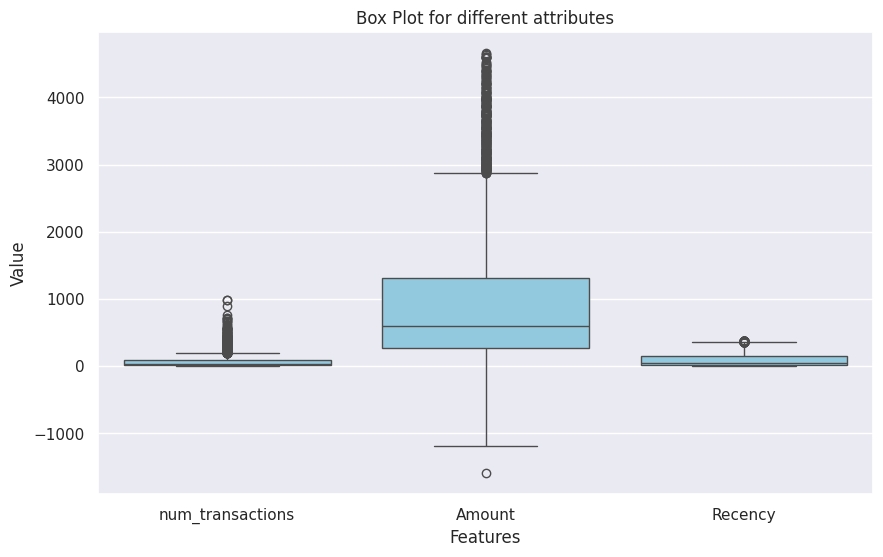

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
x=df.drop('Country' , axis='columns')
sns.boxplot(data=x ,color='skyblue')
plt.title('Box Plot for different attributes')
plt.ylabel('Value')
plt.xlabel('Features')
plt.show()

We can see in the boxplot that outliers are reduced by good amount.

Now we will scale our data using StandardScaler

There are two main reasons why we are doing this:


*   We noticed before that our data was skewed

    Observation :- scaling our data helps to reduce skewness not much but a bit.

*   Different features have values in different ranges ,some have high values while others have low.In this case there is a chance that some features dominate others,scaling helps avoid that.

* We will also work with PCA later on , before which scaling is must.

It transforms data according to the formula :-

**(x-mean)/standard_deviation**



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])

1.1742869249120096
3.4377434495316774
1.5615110449458356


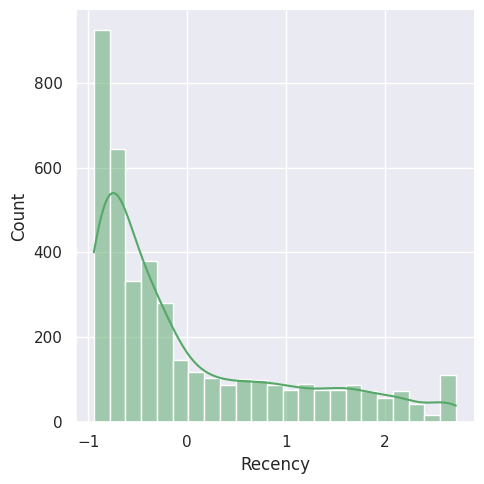

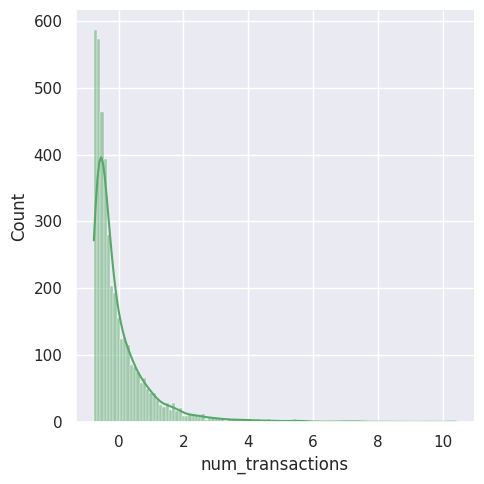

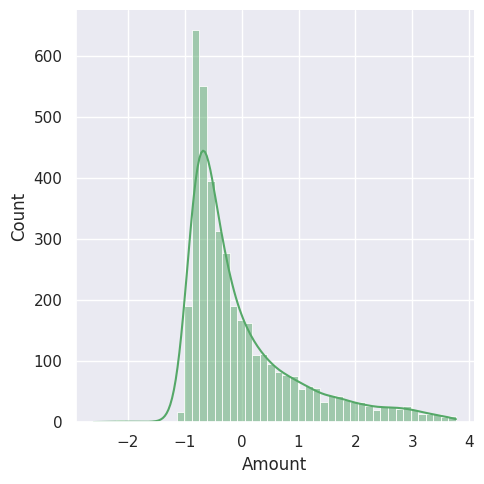

In [ ]:
num_cols=['Recency' , 'num_transactions' ,'Amount']
for col in num_cols:
  print(df[col].skew())
  sns.displot(df[col] ,kde=True , color='g')

In [ ]:
df.head()

,Country,num_transactions,Amount,Recency
CustomerID,,,,
12346.0,United Kingdom,-0.750249,-0.978423,2.247532
12347.0,Iceland,1.300940,3.412401,-0.934027
12348.0,Finland,-0.419780,0.852520,-0.217194
12349.0,Italy,0.058831,0.812085,-0.767093
12350.0,Norway,-0.579317,-0.637753,2.090418


We will label encode country values

In [ ]:
len(df.Country.unique())

36

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df.Country=label.fit_transform(df.Country)

In [ ]:
df.head()

,Country,num_transactions,Amount,Recency
CustomerID,,,,
12346.0,34,-0.750249,-0.978423,2.247532
12347.0,16,1.300940,3.412401,-0.934027
12348.0,12,-0.419780,0.852520,-0.217194
12349.0,18,0.058831,0.812085,-0.767093
12350.0,24,-0.579317,-0.637753,2.090418


## **Training our Model**

**How can we decide which model is best??**


*   We can check the elbow score ,the elbow point in which is the optimum no. of clusters
*  We can use Silhouette Score

Silhouette Score  is defined as :-

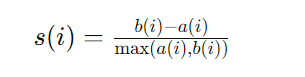


where
1. a(i) is  the avg distance b/w sample i and all other points in same cluster
2. b(i) is  the avg distance b/w sample i and all other points in nearest cluster in which sample i does not belong.

*  Silhouette Score ranges from -1 to 1
*   score=-1 means the sample is classified in wrong cluster
*   score=1 means the sample is correctly classified in its cluster

* When the score is close to 1 our model is good.
* It considers both the factors ,
 similarity between data points belonging to same cluster and dissimilarity between data points belonging to different clusters.



In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model=KMeans(n_clusters=4 , max_iter=50)
model.fit(df)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
model.labels_
# This attribute gives the labels i.e the cluster no. that each data point is accociated with

array([0, 1, 1, ..., 0, 3, 3], dtype=int32)

model.inertia_ gives us the sum of squared distances between each datapoint and the nearest center of cluster.

The less it is the better.


In [ ]:
model.inertia_

12791.841984631987

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
n_clusters_values=range(3,8)
inertia=[]
for i in n_clusters_values:
  model=KMeans(n_clusters=i , max_iter=50)
  model.fit(df)
  inertia.append(model.inertia_)
  print('Elbow score for cluster= {} is {}'.format(i , model.inertia_))


Elbow score for cluster= 3 is 17460.714226498654
Elbow score for cluster= 4 is 12791.77714730706
Elbow score for cluster= 5 is 9424.924079585508
Elbow score for cluster= 6 is 6790.142257012928
Elbow score for cluster= 7 is 5778.588064294663


In [ ]:
print(inertia)
print(n_clusters_values)

[17460.714226498654, 12791.77714730706, 9424.924079585508, 6790.142257012928, 5778.588064294663]
range(3, 8)


Text(0.5, 1.0, 'Elbow curve')

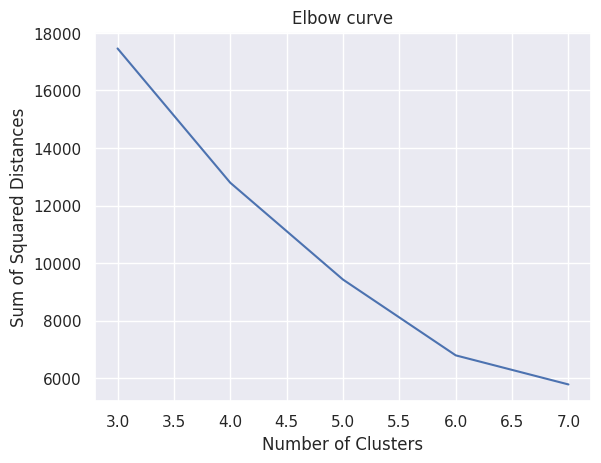

In [ ]:
sns.lineplot(x=n_clusters_values , y=inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow curve')

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters_values=range(2,9)
for i in n_clusters_values:
  model=KMeans(n_clusters=i , max_iter=50)
  model.fit(df)
  labels=model.labels_
  SihouetteScore=silhouette_score(df ,labels)
  print('Silhouette Score for cluster= {} is {}'.format(i , SihouetteScore))


Silhouette Score for cluster= 2 is 0.8852185172841267
Silhouette Score for cluster= 3 is 0.8644009103208183
Silhouette Score for cluster= 4 is 0.4645897561448388
Silhouette Score for cluster= 5 is 0.4838436782134593
Silhouette Score for cluster= 6 is 0.4824984856640999
Silhouette Score for cluster= 7 is 0.48039149088847527
Silhouette Score for cluster= 8 is 0.4718700384531369


Silhoutte Score is high for both n_clusters=2 and 3 where elbow method suggests n_clusters around 3 and 4

So we will try out both n_clusters=3 and n_clusters=4.

In [ ]:
model=KMeans(n_clusters=3 , max_iter=50)
model.fit(df)

KMeans(max_iter=50, n_clusters=3)

In [ ]:
model.labels_

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
df['ClusterID']=model.labels_

In [ ]:
df.head()

,Country,num_transactions,Amount,Recency,ClusterID
CustomerID,,,,,
12346.0,34,-0.750249,-0.978423,2.247532,0
12347.0,16,1.300940,3.412401,-0.934027,1
12348.0,12,-0.419780,0.852520,-0.217194,1
12349.0,18,0.058831,0.812085,-0.767093,1
12350.0,24,-0.579317,-0.637753,2.090418,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# This is a helper function , it will help us to find model with optimum n_clusters

def clustering(clusters ,n_init):
  model=KMeans(n_clusters=clusters , max_iter=50 , n_init=n_init)
  model.fit(df)
  df['ClusterID']=model.labels_

  plt.figure(figsize=(8,5))
  scatter = sns.scatterplot(x='ClusterID', y='Amount', hue='num_transactions', palette='plasma', data=df, legend=None)

  # Adding color bar
  cbar = plt.colorbar(scatter.collections[0], ax=plt.gca())
  cbar.set_label('Number of Transactions')
  plt.show()
  # '#31688E' ,'#FDE725'
  colors=['#1F9E89','#440154' ,'#B6DE2B'] #chose some colors from viridis
  sns.set(style="ticks")
  sns.scatterplot(df, hue='ClusterID', x='Amount' , y='num_transactions', palette=colors)
  plt.suptitle('Cluster ID vs Amount and No of Transactions', y=1.02)
  plt.show()

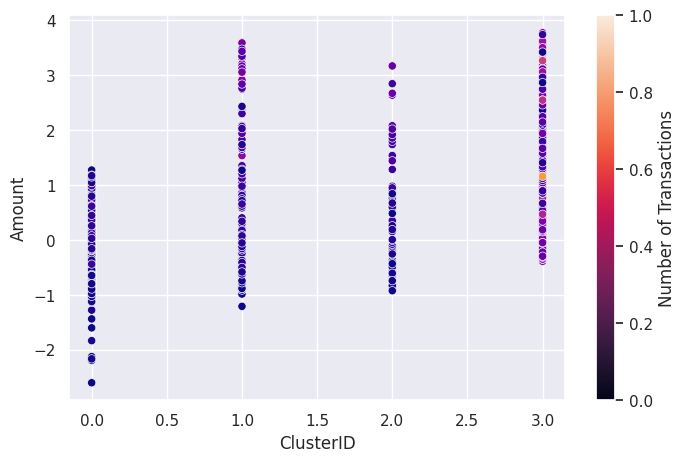

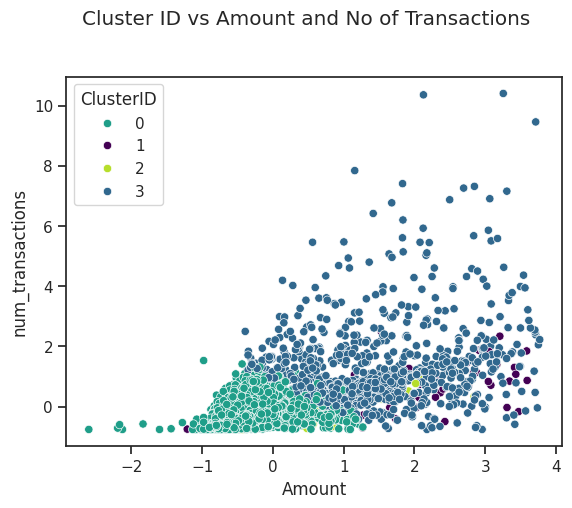

In [ ]:
clustering(4,20)

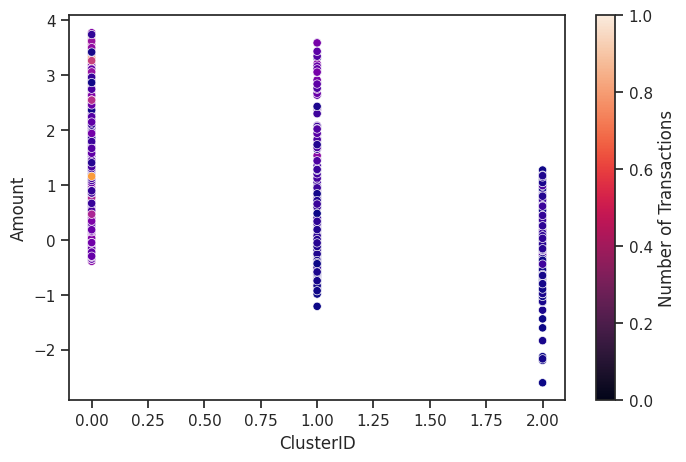

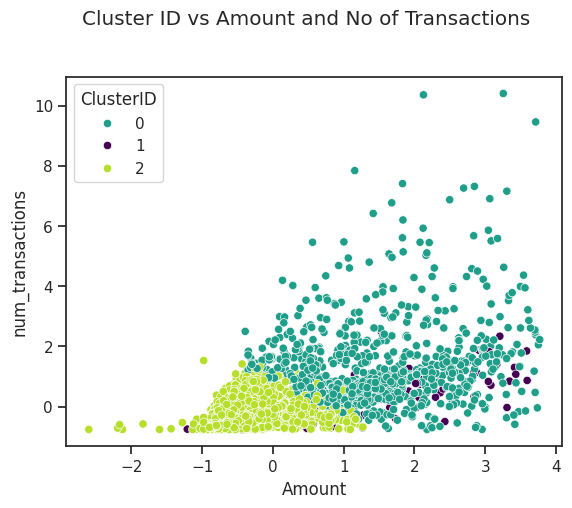

In [ ]:
clustering(3,10)

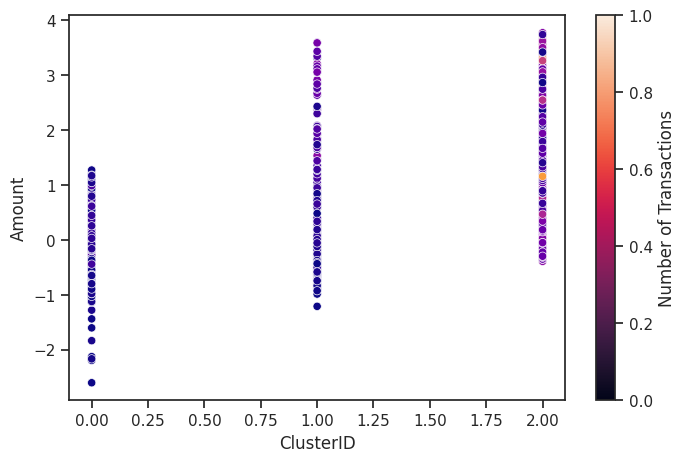

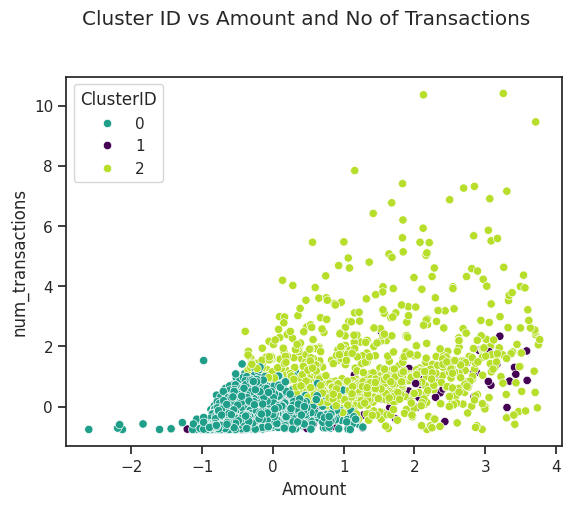

In [ ]:
clustering(3,20)

K means is sensitive the to initial values it takes up , if not initialized properly it might not converge to the most optimal solution.

Thus we played around with the parameter n_init which defines how many times the k means should repeat the process (initialization of centers->clustering->calculating inertia)
and chooses the best one.

We can clearly see adding 1 more cluster is not giving us any additional information so we will go with n_clusters=3 and n_init=10

In [ ]:
df['Country_Name']=label.inverse_transform(df['Country'])

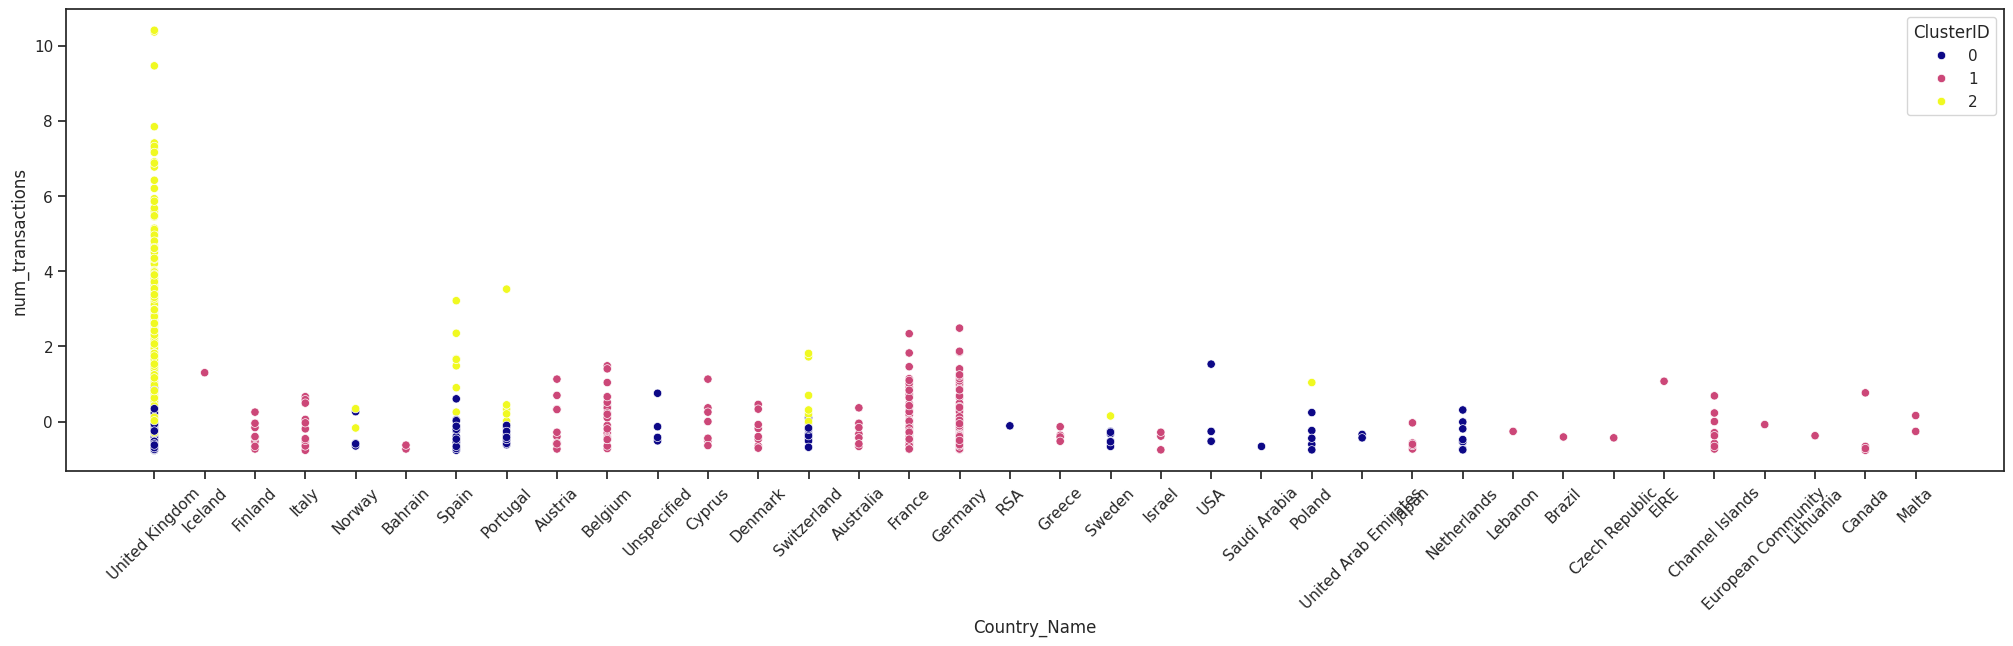

In [ ]:
plt.figure(figsize=(25,6))
sns.scatterplot(df, hue='ClusterID', y='num_transactions' , x='Country_Name', palette='plasma')
plt.xticks(rotation=45)

# plt.margins()

plt.show()

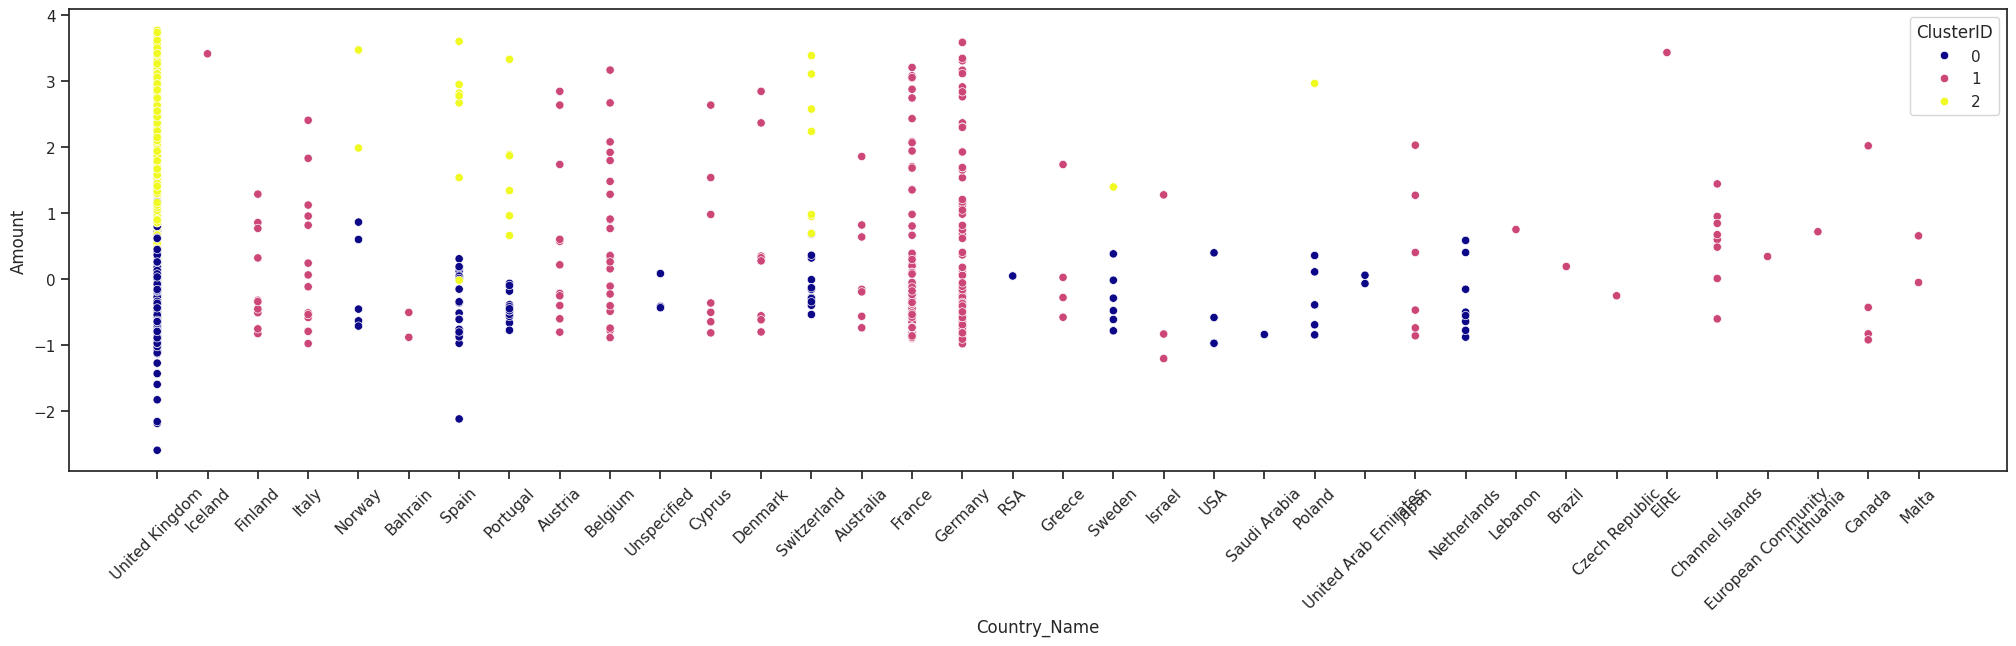

In [ ]:
plt.figure(figsize=(25,6))
sns.scatterplot(df, hue='ClusterID', y='Amount' , x='Country_Name', palette='plasma')
plt.xticks(rotation=45)

# plt.margins()

plt.show()

## **Conclusion**


*   Cluster 0 represents the people who make less transactions and even if they make amount is not that high.
*   Cluster 2 represents the ideal target customers that would probably recieve calls from the company to renew their subscription (just an example)
These are people who make more no. of transactions, also amount of their transactions is high.
Majority of people in cluster 2 belong to UK.
*  Cluster 1 represents the people who make less transactions but whenever they make it amount is sugnificant.Majority of them belong to countries like Belgium , France and Germany.



## **PCA**

Now we will be performing principle component analysis on our dataset and then perform K means clustering to classify customers into different groups.

PCA is a dimentionality reduction technique that reduces the dimensions of our dataset while preserving as much information as possible.Here we will transform our data into two dimentions with two principle components PC1 and PC2.

Note :- We tried including Country in our data but it was contributing a major chunk in our result defeating our main goal of differentiating based on purchase behaviours and country.So we will remove it for now.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca =PCA(n_components=2)
pca_data=pca.fit_transform(df.drop(['Country_Name','ClusterID' ,'Country'], axis='columns'))

In [ ]:
pca_data

array([[-2.13868074,  1.4123849 ],
       [ 3.39237334,  0.65206458],
       [ 0.37996219, -0.10446644],
       ...,
       [-0.47628421, -1.23607888],
       [ 6.00145177,  2.49286136],
       [ 0.82819398, -0.20119416]])

In [ ]:
pca_model = KMeans(n_clusters=3 , n_init=10 , max_iter=50)
pca_model.fit(pca_data)

KMeans(max_iter=50, n_clusters=3, n_init=10)

In [ ]:
def pca_clustering(n_clusters ,n_init):
  pca_model = KMeans(n_clusters=n_clusters , n_init=n_init , max_iter=50)
  pca_model.fit(pca_data)
  pca_labels=pca_model.labels_
  centroids = pca_model.cluster_centers_

  # there are 3 clusters so it returns centroids of 3 clusters for both PC1 and PC2
  print(centroids)
  pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
  pca_df['Cluster'] = pca_labels
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=100, alpha=0.7)
  plt.title('PCA of Data with K-Means Clusters')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.legend()
  plt.show()
  return pca_df

[[-0.07841874 -0.58017924]
 [ 2.38791572  0.54289319]
 [-1.41220124  0.97343434]]


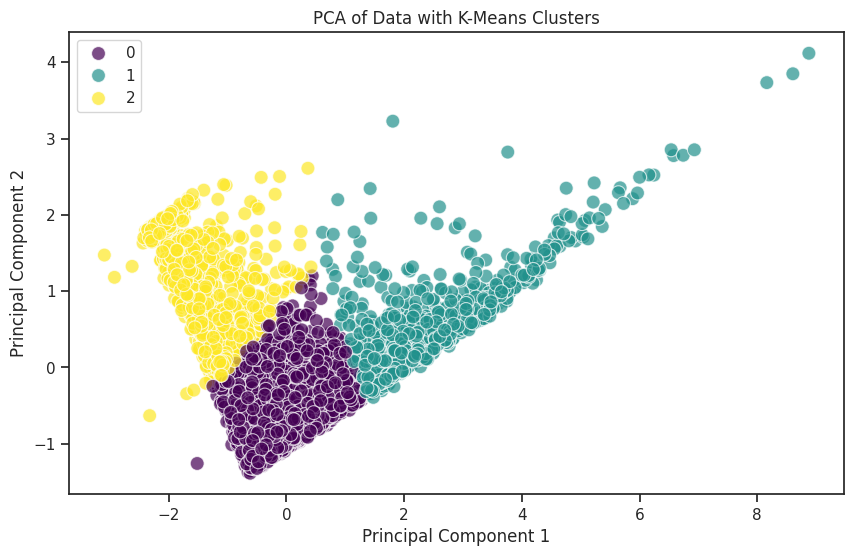

In [ ]:
pca_df=pca_clustering(3,10)

In [ ]:
pca_df.head()

,PC1,PC2,Cluster
0,-2.138681,1.412385,2
1,3.392373,0.652065,1
2,0.379962,-0.104466,0
3,0.909230,-0.419014,0
4,-1.744555,1.436807,2


In [ ]:
df1=df.drop(['Country_Name','ClusterID','Country'] , axis='columns')
pca_components = pd.DataFrame(pca.components_, columns=df1.columns, index=['PC1', 'PC2'])
# Each entry in this dataframe represents weight of each feature in a principle component
print(pca_components)

     num_transactions    Amount   Recency
PC1          0.617542  0.629698 -0.471299
PC2          0.378072  0.287795  0.879907


## **Conclusion**

1.   PC1 is positively influenced by num_transactions and Amount. It is negatively influenced by Recency.

    **Remember we talked about less Recency -> customer is more active??**

2.   PC2 is posively influenced by all three and is highly positively affected by Recency.

**Cluster Centroids**

[[ 2.38960464  0.54396105]

 [-1.41043216  0.97103084]

 [-0.07694908 -0.58093379]]

Now lets analyze clusters

1.  Cluster 0 has high positive contribution from PC1 and moderate contribution from PC2. This probably represents people with high num_transactions, high Amount and moderate recent activity.

2.  Cluster 1 has high negative contribution from PC1 and moderate positive contribution from PC2.This probably represents people with less num_transactions, low Amount and less recent activity.

3. Cluster 2  has small negative contribution from PC1 (~0) and moderate negative contribution from PC2.This probably represents people with less num_transactions, low Amount and moderate recent activity.


Cluster 1 highlights the target Customers.

